# World University Rankings 2023


With the World University Rankings 2023, we will conduct a comprehensive exloratory data analysis (EDA) to understand the dataset's structure, distribution of variables, and any missing or inconsistent data. Lets' get started with importing the necessary libraries.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import clean
%matplotlib inline

df = pd.read_csv('./university_rankings_2023.csv', encoding='utf-8')

### I. What are the top 15 universities in the world?

In [49]:
top_15 = df.head(15)
top_15

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
0,1,University of Oxford,United Kingdom,"20,965",10.6,42%,48 : 52,96.4,92.3,99.7,99.0,74.9,96.2
1,2,Harvard University,United States,"21,887",9.6,25%,50 : 50,95.2,94.8,99.0,99.3,49.5,80.5
2,3,University of Cambridge,United Kingdom,"20,185",11.3,39%,47 : 53,94.8,90.9,99.5,97.0,54.2,95.8
3,3,Stanford University,United States,"16,164",7.1,24%,46 : 54,94.8,94.2,96.7,99.8,65.0,79.8
4,5,Massachusetts Institute of Technology,United States,"11,415",8.2,33%,40 : 60,94.2,90.7,93.6,99.8,90.9,89.3
5,6,California Institute of Technology,United States,"2,237",6.2,34%,37 : 63,94.1,90.9,97.0,97.3,89.8,83.6
6,7,Princeton University,United States,"8,279",8.0,23%,46 : 54,92.4,87.6,95.9,99.1,66.0,80.3
7,8,"University of California, Berkeley",United States,"40,921",18.4,24%,52 : 48,92.1,86.4,95.8,99.0,76.8,78.4
8,9,Yale University,United States,"13,482",5.9,21%,52 : 48,91.4,92.6,92.7,97.0,55.0,70.9
9,10,Imperial College London,United Kingdom,"18,545",11.2,61%,40 : 60,90.4,82.8,90.8,98.3,59.8,97.5


In [50]:
# What is the shape of the DataFrame?
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2341, 13)


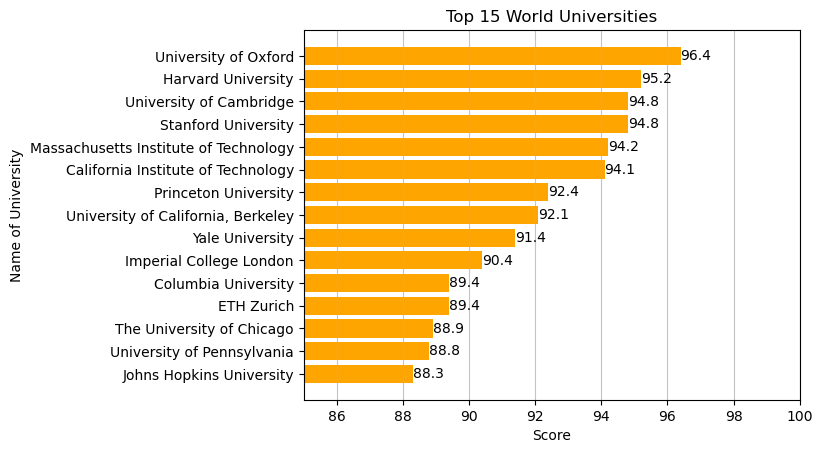

In [51]:
# Top 15 World Universities
top_15_name = list(top_15['Name of University'])
top_15_score = list(top_15['OverAll Score'].astype(float))

# Plotting
fig, ax = plt.subplots()
ax.barh(top_15_name,top_15_score, color='orange')
plt.title('Top 15 World Universities')
plt.xlabel('Score')
plt.ylabel('Name of University')
plt.grid(axis='x', alpha=0.75)
plt.xlim(85,100)

for bars in ax.containers:
    ax.bar_label(bars)
plt.gca().invert_yaxis()
plt.show()

This is a tight competition between the top 15 Universities.

### II. What countries have the most universities ranked in the top 100 in the world?

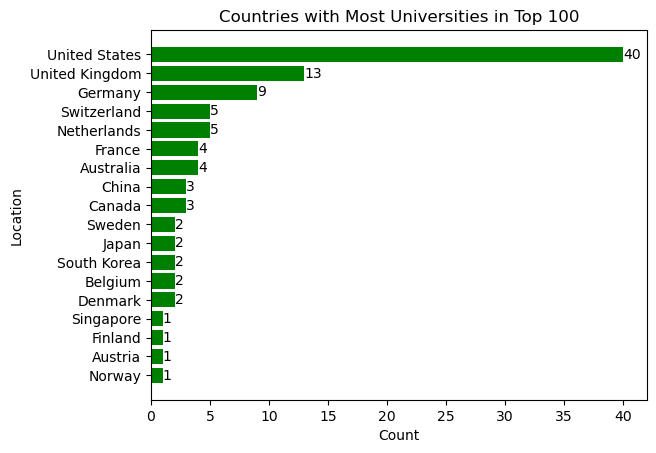

In [52]:
# We exclude the schools missing locations
df_location = df[df['Location'].notna()]

# Top 100 Universities by Country
top_100 = df_location.head(100)
top_countries = top_100['Location'].value_counts()
list(top_countries.index)

# Plotting the top 100 universities by country
fig, ax = plt.subplots()
ax.barh(list(top_countries.index),list(top_countries), color='green')
plt.title('Countries with Most Universities in Top 100')
plt.xlabel('Count')
plt.ylabel('Location')
for bars in ax.containers:
    ax.bar_label(bars)
plt.gca().invert_yaxis()
plt.show()

With 39 universities ranking among the top 100, the United States is unquestionably the clear winner of this leaderboard. Following behind is the United Kingdom, which has fewer than half the number of universities as the United States. Germany comes in third place. There are 2 countries in North America, 6 countries in Europe, 1 country in Oceania and 1 in Asia in the top 10 countries.

In [53]:
top_countries

United States     40
United Kingdom    13
Germany            9
Switzerland        5
Netherlands        5
France             4
Australia          4
China              3
Canada             3
Sweden             2
Japan              2
South Korea        2
Belgium            2
Denmark            2
Singapore          1
Finland            1
Austria            1
Norway             1
Name: Location, dtype: int64

### III. What is the significant indicator of the rankings of the universities in this data?

In [54]:
df.tail(10)

,University Rank,Name of University,Location,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
2331,-,Ulster University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,19.9,22.3,50.5,39.0,77.6
2332,-,Umm Al-Qura University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,30.2,13.3,51.7,59.9,82.2
2333,-,Paris Lodron Universität Salzburg,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.5,22.8,48.8,41.3,95.2
2334,-,Wenzhou University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,14.9,11.2,86.3,40.6,27.8
2335,-,University of the Western Cape,NaN,NaN,NaN,NaN,NaN,34.0–39.2,20.4,23.7,61.6,36.9,55.8
2336,-,University of the West of Scotland,NaN,NaN,NaN,NaN,NaN,34.0–39.2,24.1,15.5,61.5,37.9,76.8
2337,-,University of Windsor,NaN,NaN,NaN,NaN,NaN,34.0–39.2,35.1,29.4,34.5,44.2,88.7
2338,-,University of Wolverhampton,NaN,NaN,NaN,NaN,NaN,34.0–39.2,18.2,14.3,68.8,37.3,72.0
2339,-,University of Wuppertal,NaN,NaN,NaN,NaN,NaN,34.0–39.2,26.4,26.7,52.8,52.1,47.6
2340,-,Xi’an Jiaotong-Liverpool University,NaN,NaN,NaN,NaN,NaN,34.0–39.2,17.8,14.8,68.2,38.2,72.4


We can see that the OverAll Score can be a range between two value. This can be replaced by the average of the bounds.

In [55]:
# What is the data type of each column?
print(df.dtypes)

# Change the data type of the OverAll Score column to float
df['OverAll Score'] = [clean.range_hyphen_remover(str(score)) for score in df['OverAll Score']]
df['OverAll Score'] = df['OverAll Score'].astype(float)


University Rank                 object
Name of University              object
Location                        object
No of student                   object
No of student per staff        float64
International Student           object
Female:Male Ratio               object
OverAll Score                   object
Teaching Score                 float64
Research Score                 float64
Citations Score                float64
Industry Income Score          float64
International Outlook Score    float64
dtype: object


In [56]:
# Are there any missing values?
print(df.isnull().sum())

# Drop the rows with missing values in scores
df_scores = df[['OverAll Score', 'Teaching Score','Research Score','Citations Score',\
    'Industry Income Score', 'International Outlook Score']].copy()  
df_scores.dropna(how='any', inplace=True)

University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64


array([[<AxesSubplot:title={'center':'OverAll Score'}>,
        <AxesSubplot:title={'center':'Teaching Score'}>],
       [<AxesSubplot:title={'center':'Research Score'}>,
        <AxesSubplot:title={'center':'Citations Score'}>],
       [<AxesSubplot:title={'center':'Industry Income Score'}>,
        <AxesSubplot:title={'center':'International Outlook Score'}>]],
      dtype=object)

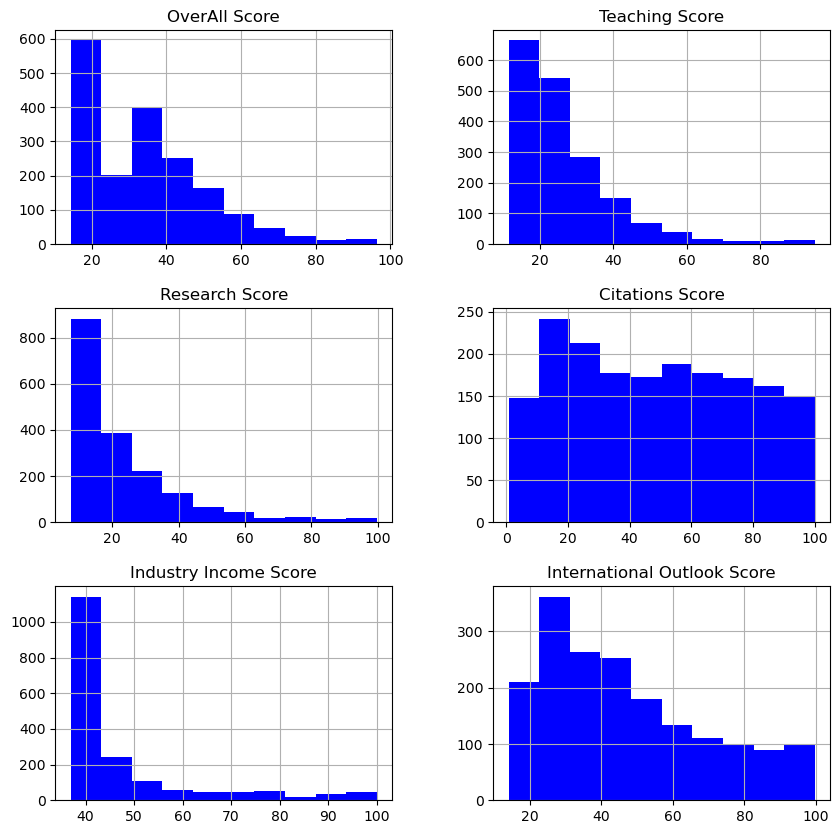

In [57]:
df_scores.hist(figsize=(10,10), bins=10, color='blue')

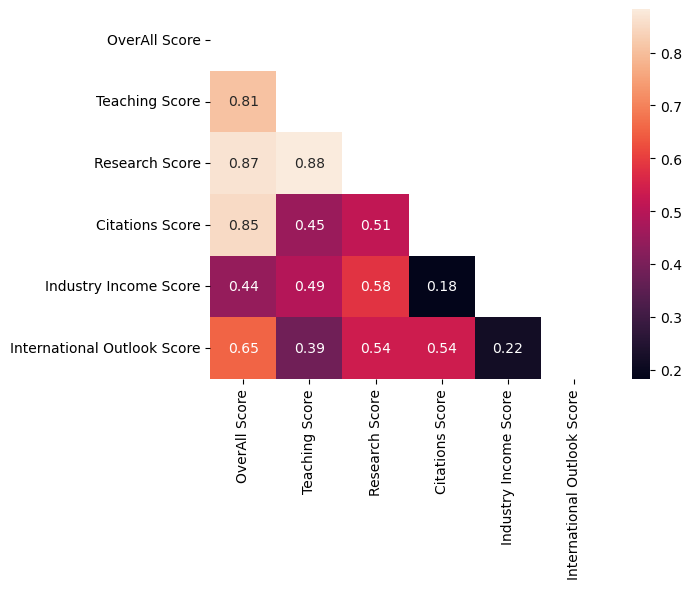

In [58]:
corr = df_scores.corr()
# Only need the Upper Triangle of the co-relation matrix because of symmetry
matrix = np.triu(corr)
sns.heatmap(df_scores.corr(), annot=True, fmt=".2f", mask=matrix);

From the heat map above, we can see that the ranking (OverAll Score) of the universities is influenced by the following indicators:
1. Research Score - 0.87
2. Citations Score - 0.85
3. Teaching Score - 0.81